<a href="https://colab.research.google.com/github/suryakiran594/DS/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install tensorflow-cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 MB 5.3 MB/s eta 0:00:00


In [7]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [8]:
#import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# divide the dataset into independent and dependent features
##remove rownumber, customer id, surname

X=dataset.iloc[:,3:13]  #all rows and columns from 3rd to 12th
y=dataset.iloc[:,13]

In [13]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

##Feature Engineering

In [17]:
geography=pd.get_dummies(X['Geography'])   #using get_dummies we can create one hot encoded values for the colum values of geography as below

In [18]:
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [42]:
geography=geography.astype(float)

In [43]:
geography=pd.get_dummies(X['Geography'],drop_first=True) 

In [46]:
geography=geography.astype(float)

In [47]:
geography.dtypes

Germany    float64
Spain      float64
dtype: object

In [48]:
gender=pd.get_dummies(X['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [50]:
## Concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [51]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [52]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [53]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,0.0,0.0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0.0,1.0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,0.0,0.0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0.0,0.0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,0.0,0.0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,0.0,0.0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0,0.0,0.0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,1.0,0.0,1


# Train Test Split

In [54]:
#splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Note: For which all algotithms feature scaling is required ?
      Required for : ANN, LR, Log Reg
      a) where ever distance band is involved
      b) Gradient Descent

# Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [56]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [57]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [58]:
X_train.shape

(8000, 11)

#Part 2

# Create a ANN Model

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [60]:
#Initialzing ANN

classifier=Sequential()

In [62]:
#Adding the input Layer
#I need to have 11 layers
classifier.add(Dense(units=11,activation='relu'))
#classifier.add(Dropout(0.2))

In [63]:
#adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))


In [64]:
#adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))


In [65]:
#addint the output layer
classifier.add(Dense(1, activation='sigmoid'))


#Train the neural network

In [78]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

##Early Stopping 

In [80]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [82]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3168 - accuracy: 0.8735 - val_loss: 0.3773 - val_accuracy: 0.8554
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3166 - accuracy: 0.8739 - val_loss: 0.3664 - val_accuracy: 0.8531
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3191 - accuracy: 0.8744 - val_loss: 0.3568 - val_accuracy: 0.8599
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.8765 - val_loss: 0.3647 - val_accuracy: 0.8614
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3208 - accuracy: 0.8735 - val_loss: 0.3627 - val_accuracy: 0.8595
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8726 - val_loss: 0.3619 - val_accuracy: 0.8569
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3201 - accuracy: 0.8727 - val_loss: 0.3775 - val_accuracy:

In [84]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

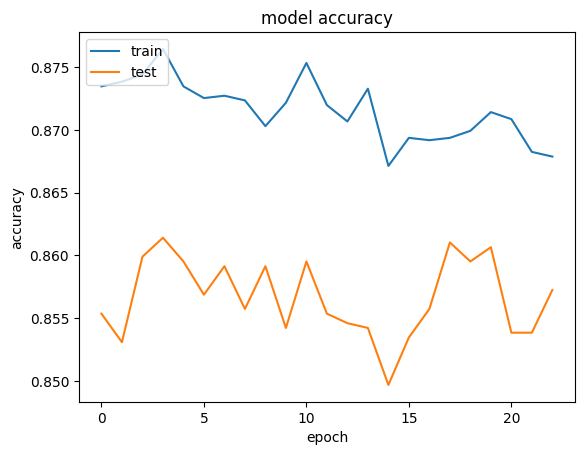

In [85]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

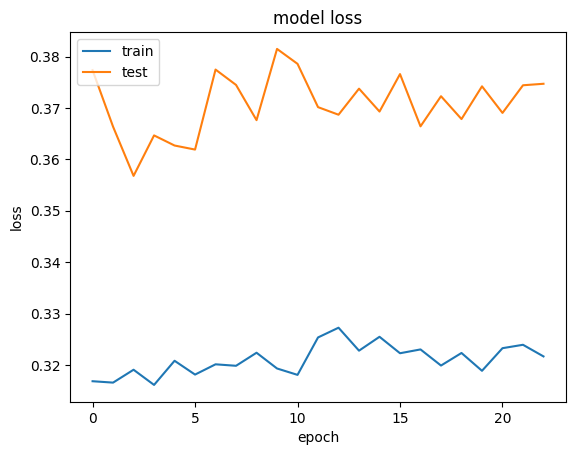

In [86]:
#summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#Part 3

# Making predictions and evaluating the model

In [87]:
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [88]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [89]:
cm

array([[1534,   61],
       [ 212,  193]])

In [90]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [91]:
score

0.8635

In [93]:
# get the weights

classifier.get_weights()

[array([[ 5.0301147e-01, -1.5728518e+00,  7.2509009e-01,  3.0621743e-01,
          1.7776409e-01, -4.6331782e-02, -6.0589308e-01, -1.7716670e+00,
         -9.3576360e-01, -3.8854632e-01,  6.2808441e-03],
        [-4.7795882e+00,  4.3982897e+00,  3.8597279e+00,  4.3565235e+00,
         -1.8431141e+00,  9.1867363e-01, -6.9404464e+00, -4.3342805e+00,
         -1.1445295e+00, -3.7167687e+00,  1.6828263e-01],
        [ 2.6088029e-01, -2.3051097e+00,  1.6964748e+00,  1.8462763e+00,
          2.0142202e+00,  5.5998278e-01,  1.1182457e-01, -9.1420174e-01,
          2.3653609e-01,  6.9732845e-01,  6.3338298e-01],
        [-2.6373055e+00,  3.6259561e+00,  8.6344957e-01, -1.0476748e+00,
         -5.6292367e+00, -4.7604437e+00,  2.0115585e+00,  8.2833731e-01,
         -1.5828095e-01,  6.1760509e-01, -4.7907839e+00],
        [-3.8911316e-01, -4.6580294e-01,  2.0642345e+00,  1.3601141e+00,
          1.3057038e+00, -6.1943560e+00,  1.1137169e-01,  3.5891278e+00,
          5.6015873e+00, -8.3705425e-0